Author: Amelia Xie

Date(s): 10/10/22

10/10/22

# Research background and aim
We will look at the dataset corresponding to participant 4 with the goal of analysing the step counts of participants in a week.

Let's load in the data

In [1]:
import pandas as pd
url = "../../../datasets/Participant-07.csv"
p7 = pd.read_csv(url)

Let's have a look at the dataset

In [2]:
p7.head(10)

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
5,01-Jan-2022 05:00,01-Jan-2022 06:00,0.0
6,01-Jan-2022 06:00,01-Jan-2022 07:00,0.0
7,01-Jan-2022 07:00,01-Jan-2022 08:00,0.0
8,01-Jan-2022 08:00,01-Jan-2022 09:00,0.0
9,01-Jan-2022 09:00,01-Jan-2022 10:00,526.0


In [3]:
p7.describe()

,Steps (count)
count,6133.000000
mean,323.430904
std,560.310200
min,0.000000
25%,0.000000
50%,102.000000
75%,362.853757
max,5456.232868


Participant 4 walks an average of 323 steps per hour, and at least three-quarters of the data consists of step counts around or below this number. The highest number of steps recorded was 5456. 

I should check if there are any values that require data engineering.

In [4]:
p7.isna().any()

Start            False
Finish           False
Steps (count)    False
dtype: bool

There does not appear to be any missing or invalid values in the data. 

Since I am analysing trends across a week, it would make sense to convert the dates into week format. I will create a new column for the days of the week and group them together.

In [5]:
p7['Start'] = pd.to_datetime(p7['Start'])
p7['Day of week'] = p7['Start'].dt.day_name()
p7["Steps (count)"] = round(p7["Steps (count)"])
p7["Steps (count)"] = p7["Steps (count)"].astype(int)

#convert step counts to whole numbers
week_count = p7.groupby(['Day of week'])['Steps (count)'].sum()
week_count 

Day of week
Friday       253463
Monday       320381
Saturday     306291
Sunday       237625
Thursday     294583
Tuesday      286321
Wednesday    284937
Name: Steps (count), dtype: int32

It appears that this participant is most active on Mondays and the least active on Sundays, although the step counts for other days seem to be fairly consistent. We should plot the data to better identify the trends within each day.

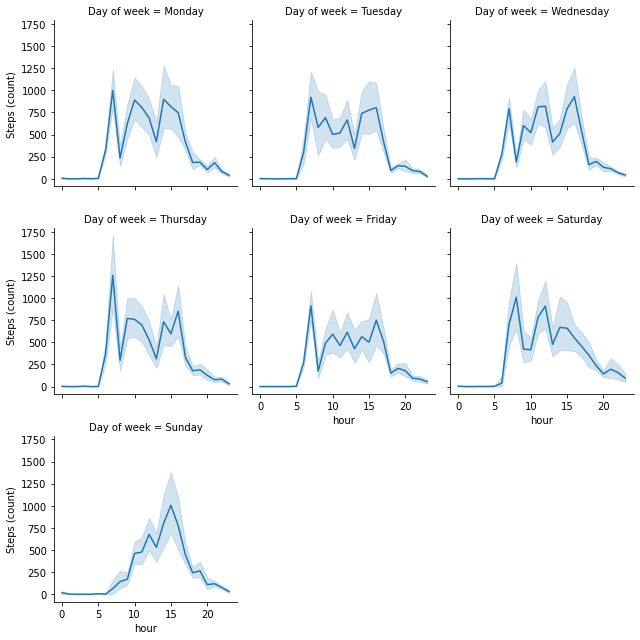

In [6]:
import seaborn as sns
p7['hour'] = p7['Start'].dt.hour
p7['date'] = p7['Start'].dt.date
dest = '../../../datasets/Modified_dataset07.csv'
# 10/10/22
p7.to_csv(dest) #saving a csv to do future analyses on
#
plot = sns.FacetGrid(p7, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.lineplot, "hour", "Steps (count)")

It appears that this participant records the most activity in three intervals across the day on weekdays, while there is one noticeable peak at hour 15 on Sundays.